<img src='https://data.cityofchicago.org/api/assets/73F1665C-0FE6-4183-8AD1-E91DB8EFAFA4?7CB02402-8E06-48B0-8C9A-3890182D58C7.png'>

## Package setup.

In [1]:
# # In case you have the wrong version of Pandas installed, remove it and install the ver that's compat with PandasAI in your venv. 
# # !pip uninstall pandas -y

# # Install some needed packages
# !pip install -U pandasai --quiet
# !pip install pandas==1.5.3
# !pip install -U plotly
# !pip install -U numpy
# !pip install -U matplotlib
# !pip show pandas
# !pip show pandasai

## Read the local crime csv

In [2]:
import pandas as pd
crime = pd.read_csv('./chicago_iucr.csv')

import warnings
warnings.filterwarnings('ignore')


## Create a head Df to help the AI with col name descs. 

In [3]:
df_head = crime.head(3)
#df_head

In [4]:
field_descriptions = {
    "id": "Unique identifier for the record.",
    "date": "The Date when the incident occurred. Stored as text.",
    "block": "Partially redacted address where the incident occurred, within the same block as the actual address.",
    "location_description": "Description of the location where the incident occurred.",
    "arrest": "Indicates whether an arrest was made.",
    "domestic": "Indicates whether the incident was domestic-related as per the Illinois Domestic Violence Act.",
    "beat": "Police beat where the incident occurred, part of the smallest police geographic area.",
    "district": "Police district where the incident occurred.",
    "ward": "City Council district (ward) where the incident occurred.",
    "community_area": "Indicates the community area where the incident occurred, with Chicago having 77 community areas.",
    "fbi_code": "Crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).",
    "latitude": "Latitude of the incident location, shifted for partial redaction but on the same block.",
    "longitude": "Longitude of the incident location, shifted for partial redaction but on the same block.",
    "crime": "The crime committed, aka the incident."
}


## Import all our Pandas AI stuff & set up our GPT Model (Azure, OpenAI or Local) Behavior

In [5]:
import os
from pandasai import SmartDataframe
from pandasai.llm import AzureOpenAI
from pandasai.llm.local_llm import LocalLLM
from pandasai.llm import OpenAI
from pandasai import Agent
from pandasai.llm.openai import OpenAI
from pandasai.connectors import PandasConnector
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

# Get my Openai Var Key
open_ai_key = os.getenv('OPENAI_API_KEY')

# Choose the model
select_model = 'OpenAI' #OpenAI $$, #AzureOpenAI #Presdio #Local MyModel mY Macbook

if select_model == 'Azure':
    # Define the LLM model for Azure (if True)
    azure_api_key = os.getenv('AZURE_OPENAI_API_KEY')
    azure_api_ver = os.getenv('AZURE_API_VERSION')
    azure_api_endpt = os.getenv('AZURE_OPENAI_ENDPOINT')
    azure_oai_deployment = os.getenv('AZURE_OPENAI_DEPLOYMENT')
    llm = AzureOpenAI(
        api_token=azure_api_key,
        azure_endpoint=azure_api_endpt,
        api_version=azure_api_ver,
        deployment_name=azure_oai_deployment,
        temperature=0,
        seed=26,
    )
elif select_model == 'OpenAI':
    openai_api_key = os.getenv('OPENAI_API_KEY')
    llm = OpenAI(api_token=openai_api_key, 
                 temperature=0,
                 seed=35,
                )
    
elif select_model == 'Local':
    llm = LocalLLM(api_base="http://host.docker.internal:1234/v1",
                  temperature=0, 
                  seed=55,
                  )


# A description of the overall table
description = '''You are a data analysis agent. Your main goal is to help non-technical users to analyze data.\
                This dataset reflects reported incidents of crime (with the exception of murders where \
                data exists for each victim) that occurred in the City of Chicago from 2001 to present, \
                minus the most recent seven days. Data is extracted from the Chicago Police Department's \
                CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, \
                addresses are shown at the block level only and specific locations are not identified. '''

# Define my connector
agent = Agent(crime, config={'llm': llm,
                            'description': description,
                            'enable_cache': False,
                            'verbose': False,
                            'field_description': field_descriptions,
                            'save_charts': False,
                            'save_charts_path': './saved_plots',
                            }
             )

## Simple Chat

'/Users/eric/Library/CloudStorage/OneDrive-Personal/dev/pandasAi/exports/charts/temp_chart.png'

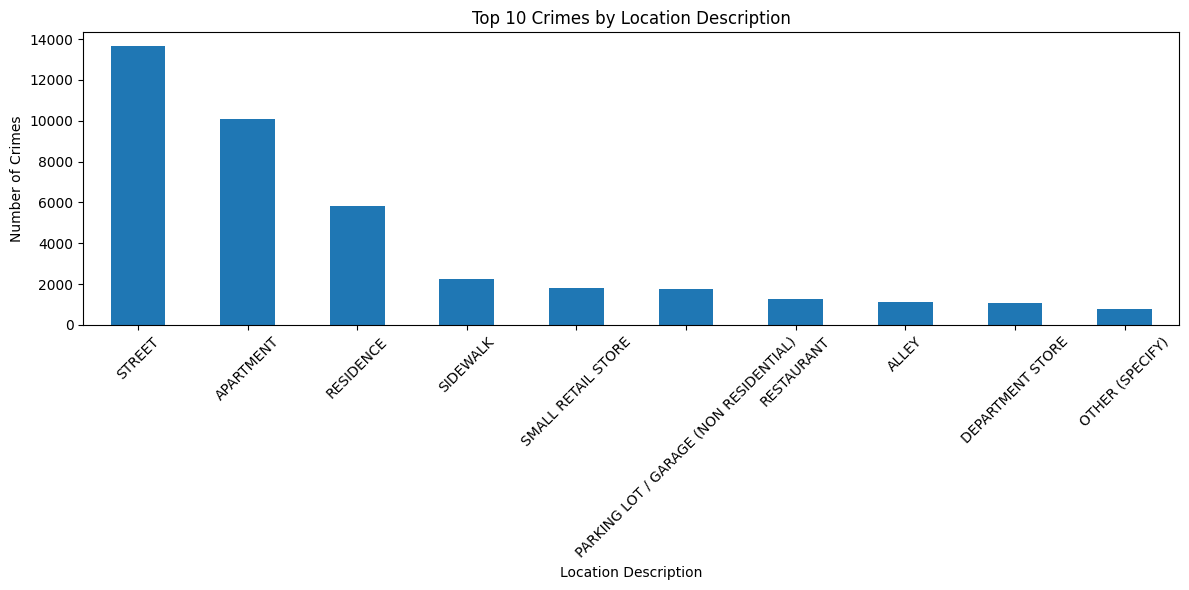

In [9]:
query = ''' Graph the top 10 crime by location_description and if the location_description is missing in any way, then make it say unknown.  '''
agent.chat(query=query)

In [7]:
print(agent.last_code_generated)

import pandas as pd
import plotly.express as px

# Concatenate the dataframes
df = pd.concat(dfs)

# Fill missing values in 'location_description' with 'Unknown'
df['location_description'].fillna('Unknown', inplace=True)

# Get the top 10 crimes by location_description
top_crimes = df['location_description'].value_counts().head(10)

# Create a bar plot using Plotly
fig = px.bar(x=top_crimes.index, y=top_crimes.values, labels={'x': 'Location Description', 'y': 'Number of Crimes'}, title='Top 10 Crimes by Location Description')
fig.show()


In [8]:
agent.explain()

'I analyzed the data to find the most common locations where crimes occur. I made sure to account for any missing information by labeling it as "Unknown". Then, I created a visual representation of the top 10 locations with the highest number of crimes. Finally, I saved the graph as an image for easy viewing.'